<a href="https://colab.research.google.com/github/grod6259/HFDataAnalytics2023-2024/blob/main/Python_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#load in the packages
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#load the data
df= pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [6]:
#find out how big the dataset is
df.shape

(101766, 50)

In [7]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
#Find out information on categories in the data set
categories = df.dtypes[df.dtypes == "object"].index

In [11]:
print(categories)

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [12]:
#drop columns I don't need to clean the data
df[categories].describe()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [13]:
df.drop (columns=['encounter_id', 'weight', 'admission_type_id','discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone'], axis=1, inplace=True)

In [14]:
#check to make sure the columns dropped
df. head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,No,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,Ch,Yes,NO


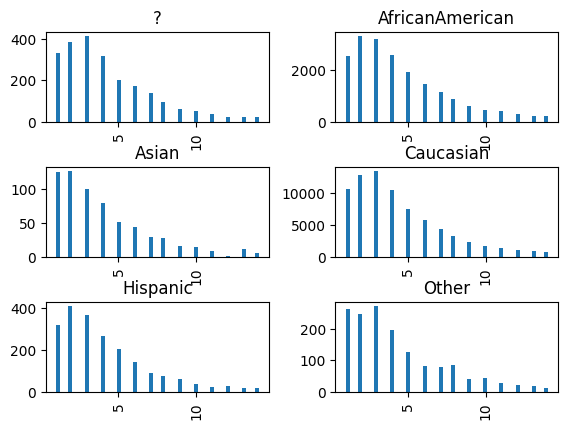

In [15]:
#which race has spent more time in the hospital"
df.hist(column='time_in_hospital', by='race', bins=50)
plt.show()

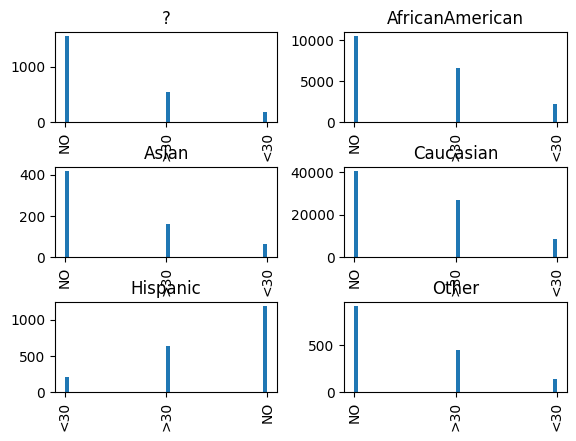

In [16]:
#which race is readmitted the most
df.hist(column='readmitted', by='race', bins=50)
plt.show()

In [17]:
#the average time spent in hospital is about 4 days
df['time_in_hospital'].mean ()

4.395986871843248

In [18]:
#the average time caucasians spent in the hospital is about 4 days
df[df['race'] == 'Caucasian']['time_in_hospital'].mean()

4.385721231553634

In [19]:
df.describe()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [20]:
#which gender spends more time in hospital
df.groupby('gender')['time_in_hospital'].mean().sort_values(ascending=False)

gender
Female             4.478797
Male               4.299777
Unknown/Invalid    3.333333
Name: time_in_hospital, dtype: float64

In [21]:
#which gender is more times readmitted
df.groupby('gender')['readmitted'].value_counts().sort_values(ascending=False)

gender           readmitted
Female           NO            29038
Male             NO            25823
Female           >30           19518
Male             >30           16027
Female           <30            6152
Male             <30            5205
Unknown/Invalid  NO                3
Name: count, dtype: int64

In [56]:
#keep only the data I will be using for easier analysis
keep_columns=['race', 'gender', 'time_in_hospital', 'readmitted', 'num_lab_procedures']

In [57]:
my_df= df[keep_columns]

In [58]:
#confirm the columns kept in the data frame
my_df.head()

,race,gender,time_in_hospital,readmitted,num_lab_procedures
0,Caucasian,Female,1,NO,41
1,Caucasian,Female,3,>30,59
2,AfricanAmerican,Female,2,NO,11
3,Caucasian,Male,2,NO,44
4,Caucasian,Male,1,NO,51


In [59]:
#filter the data to only include caucasian
my_df[my_df['race']=='Caucasian']

,race,gender,time_in_hospital,readmitted,num_lab_procedures
0,Caucasian,Female,1,NO,41
1,Caucasian,Female,3,>30,59
3,Caucasian,Male,2,NO,44
4,Caucasian,Male,1,NO,51
5,Caucasian,Male,3,>30,31
...,...,...,...,...,...
101758,Caucasian,Female,5,NO,76
101759,Caucasian,Male,1,NO,1
101763,Caucasian,Male,1,NO,53
101764,Caucasian,Female,10,NO,45


<Axes: xlabel='time_in_hospital', ylabel='num_lab_procedures'>

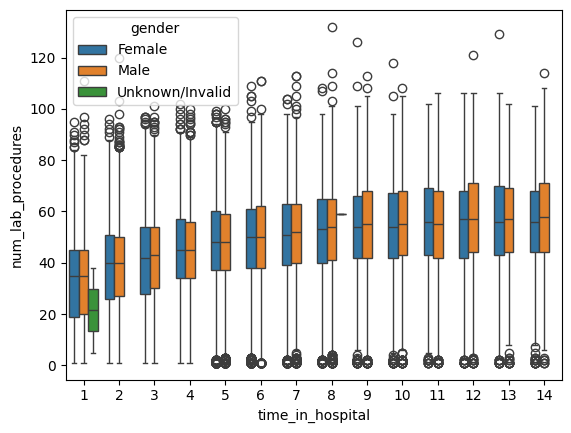

In [63]:
#create visualizations to gather more conclusions
#the more time in the hospital the more lab procedures performed, gender does not seem to play a role
sns.boxplot (x="time_in_hospital", y="num_lab_procedures", data=my_df, hue="gender")

<Axes: xlabel='time_in_hospital', ylabel='num_lab_procedures'>

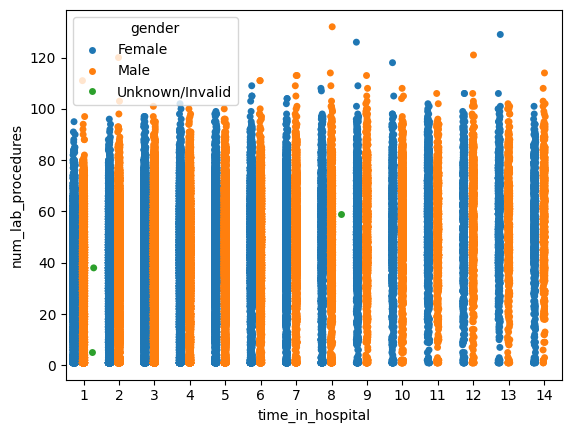

In [67]:
sns.stripplot (x="time_in_hospital", y="num_lab_procedures", data=my_df, hue= "gender", dodge=True)

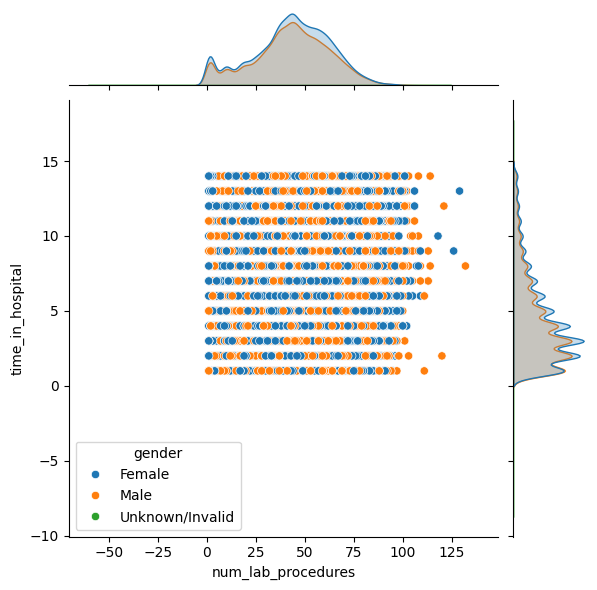

In [77]:
sns.jointplot(x="num_lab_procedures", y= "time_in_hospital", data=my_df, hue="gender")

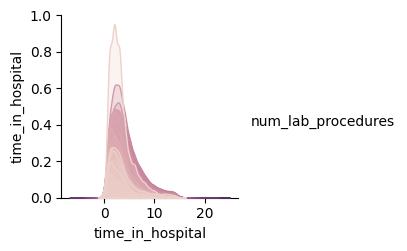

In [81]:
sns.pairplot(my_df.select_dtypes(['number']), hue= "num_lab_procedures")

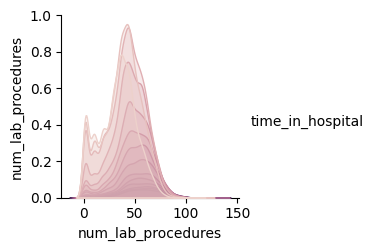

In [82]:
sns.pairplot(my_df.select_dtypes(['number']), hue= "time_in_hospital")

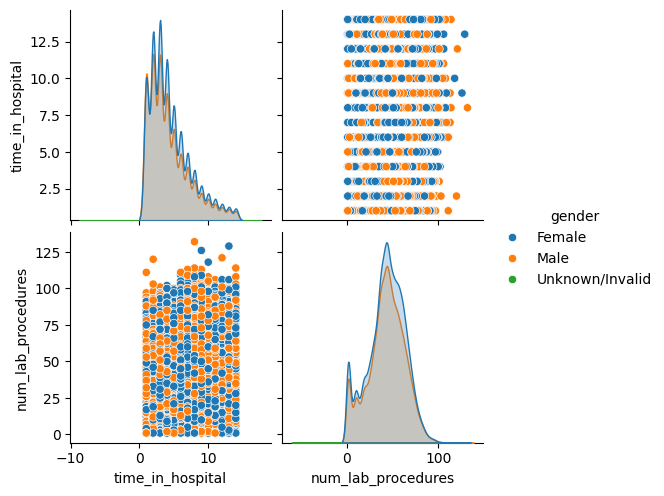

In [83]:
sns.pairplot(my_df,hue='gender')

We can conclude based on the data, that there are more caucasians who go to this  hospital. Out of all the caucasians, the average time spent in the hospital is 4 days which is about the same for both males and females. The more time spent in the hospital the more lab procedures are performed, however most of the lab procedures are done in the first 10 units of time in the hospital. Gender does not seem to play a role as the amount of differences are not significant.